In [1]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv")
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [2]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [3]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [4]:
library(dplyr)
library(plotrix)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
# 광역시도별 투표율

loc_election <-aggregate(투표수 ~ 광역시도, election, sum)
loc_election$투표율 <- round((loc_election$투표수 / sum(loc_election$투표수))*100 , 2)
loc_election <- arrange(loc_election, desc(loc_election$투표율))
loc_str = paste(loc_election$광역시도, "\n", loc_election$투표율, "%")

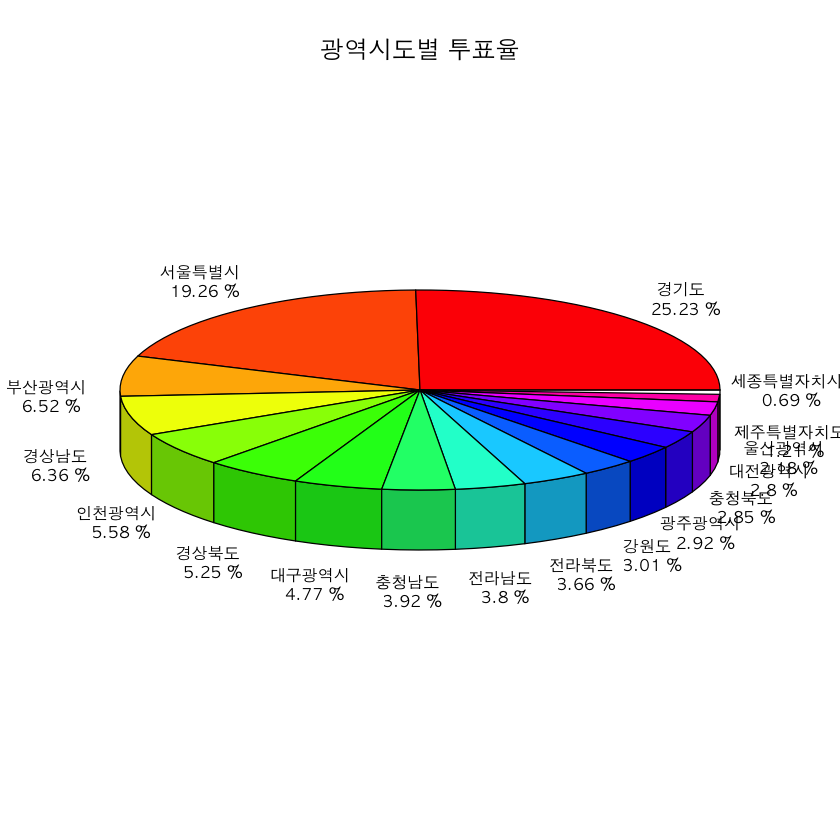

In [6]:
options(warn=-1)
par(family = "AppleGothic")
pie3D(loc_election$투표율,
    main = "광역시도별 투표율",
    labels = loc_str,  
    labelcex = 0.8,
    radius = 1
   )

In [7]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum <- apply(election[, 5:7], 1, sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [8]:
# electionRation <- 투표수 대비 electionSum의 퍼센트 구해서 넣기

election$electionRation <- round(election$electionSum/election$투표수 * 100, 2)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.01


In [9]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기
# 1) 정렬
arrange(election, desc(election$electionRation))[1,]
arrange(election, desc(election$electionRation))[nrow(election),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.7


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02


In [10]:
# 2) subset
subset(election, electionRation==max(election$electionRation))
subset(election, electionRation==min(election$electionRation))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.7


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02


In [11]:
# election_2022_job1.csv로 저장하기
write.csv(election, "../Data/election_2022_job1.csv", row.names = F)

In [12]:
# 각 후보(이재명, 윤석렬, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기 
# (단, 득표율이 3% 미마인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다. / 퍼센트 단위는 소수 한자리)

In [13]:
# 광역시도별 후보 투표수, 득표율

election_loc <- aggregate(투표수 ~ 광역시도, election, sum)
election_loc$이재명 <- aggregate(이재명 ~ 광역시도, election, sum)[, 2] 
election_loc$윤석열 <- aggregate(윤석열 ~ 광역시도, election, sum)[, 2] 
election_loc$심상정 <- aggregate(심상정 ~ 광역시도, election, sum)[, 2] 
election_loc$이재명득표율 <- round(election_loc$이재명 / sum(election_loc$이재명) * 100, 1)
election_loc$윤석열득표율 <- round(election_loc$윤석열 / sum(election_loc$윤석열) * 100, 1)
election_loc$심상정득표율 <- round(election_loc$심상정 / sum(election_loc$심상정) * 100, 1)

head(election_loc)


광역시도,투표수,이재명,윤석열,심상정,이재명득표율,윤석열득표율,심상정득표율
강원도,1015458,419644,544980,25031,2.6,3.4,3.1
경기도,8518854,4297931,3859666,201113,26.9,23.7,25.2
경상남도,2146882,794130,1237346,52591,5.0,7.6,6.6
경상북도,1774284,418371,1278922,33123,2.6,7.9,4.2
광주광역시,985492,830058,124511,14865,5.2,0.8,1.9
대구광역시,1611512,345045,1199888,31131,2.2,7.4,3.9


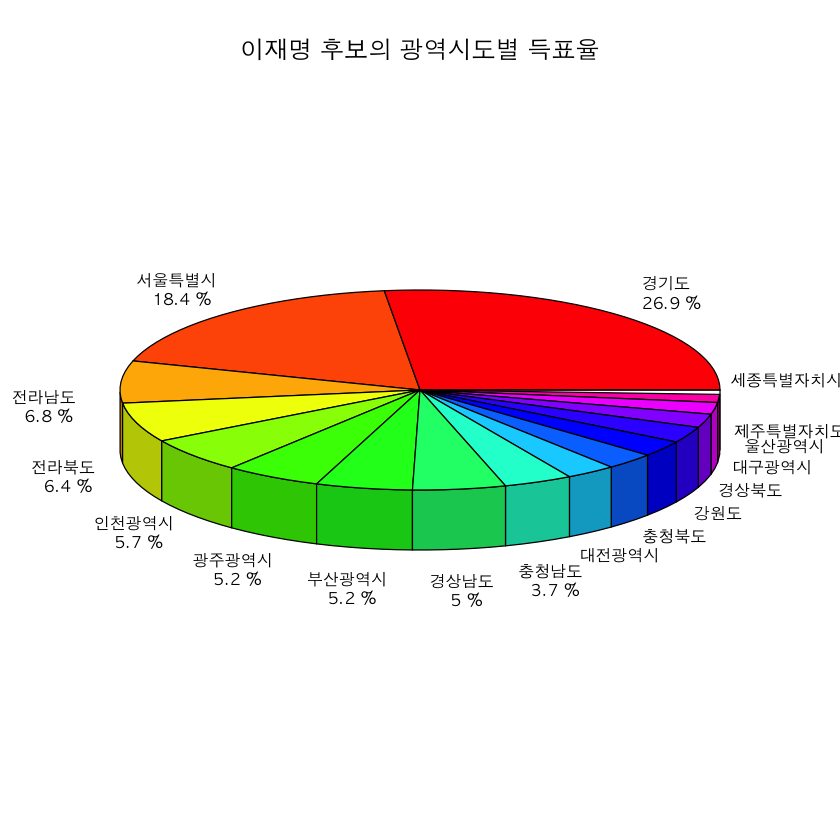

In [14]:
# 이재명 후보 광역시별 득표율
Lee = arrange(election_loc, desc(election_loc$이재명득표율))
Lee_prt = paste(Lee$광역시도, "\n", ifelse(Lee$이재명득표율>3, paste(Lee$이재명득표율, "%"), ""))


options(warn=-1)
par(family = "AppleGothic")
pie3D(Lee$이재명득표율,
    main = "이재명 후보의 광역시도별 득표율",
    labels = Lee_prt,  
    labelcex = 0.8,
    radius = 1
   )

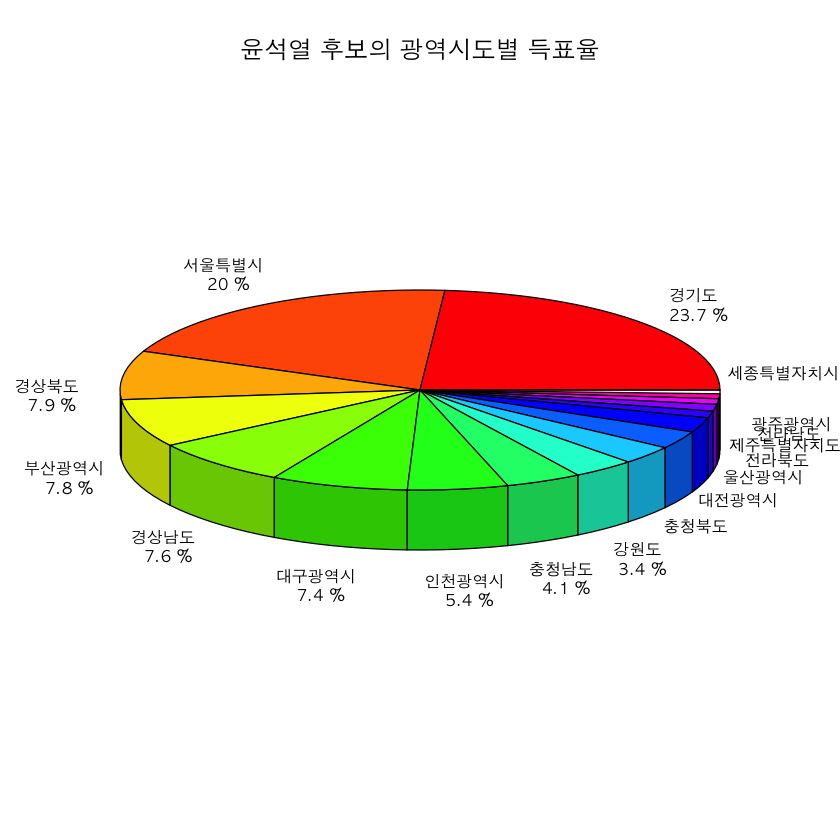

In [15]:
# 윤석열 후보 광역시별 득표율
Yoon = arrange(election_loc, desc(election_loc$윤석열득표율))
Yoon_prt = paste(Yoon$광역시도, "\n", ifelse(Yoon$윤석열득표율>3, paste(Yoon$윤석열득표율, "%"), ""))

options(warn=-1)
par(family = "AppleGothic")
pie3D(Yoon$윤석열득표율,
    main = "윤석열 후보의 광역시도별 득표율",
    labels = Yoon_prt,  
    labelcex = 0.8,
    radius = 1
   )

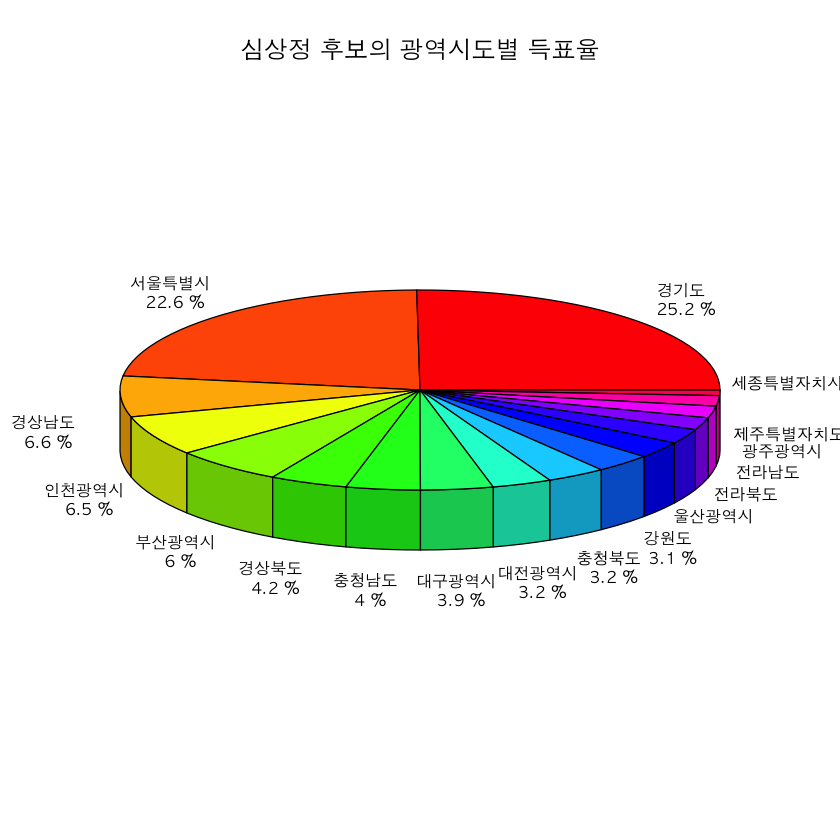

In [16]:
# 심상정 후보 광역시별 득표율
Sim = arrange(election_loc, desc(election_loc$심상정득표율))
Sim_prt = paste(Sim$광역시도, "\n", ifelse(Sim$심상정득표율>3, paste(Sim$심상정득표율, "%"), ""))

options(warn=-1)
par(family = "AppleGothic")
pie3D(Sim$심상정득표율,
    main = "심상정 후보의 광역시도별 득표율",
    labels = Sim_prt,  
    labelcex = 0.8,
    radius = 1
   )

In [208]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트
round(sum(subset(election, 광역시도=='서울특별시'|광역시도=="경기도"|광역시도=='인천광역시')[, 4]) 
      / sum(election[, 4]) * 100, 2)


[1] 50.06

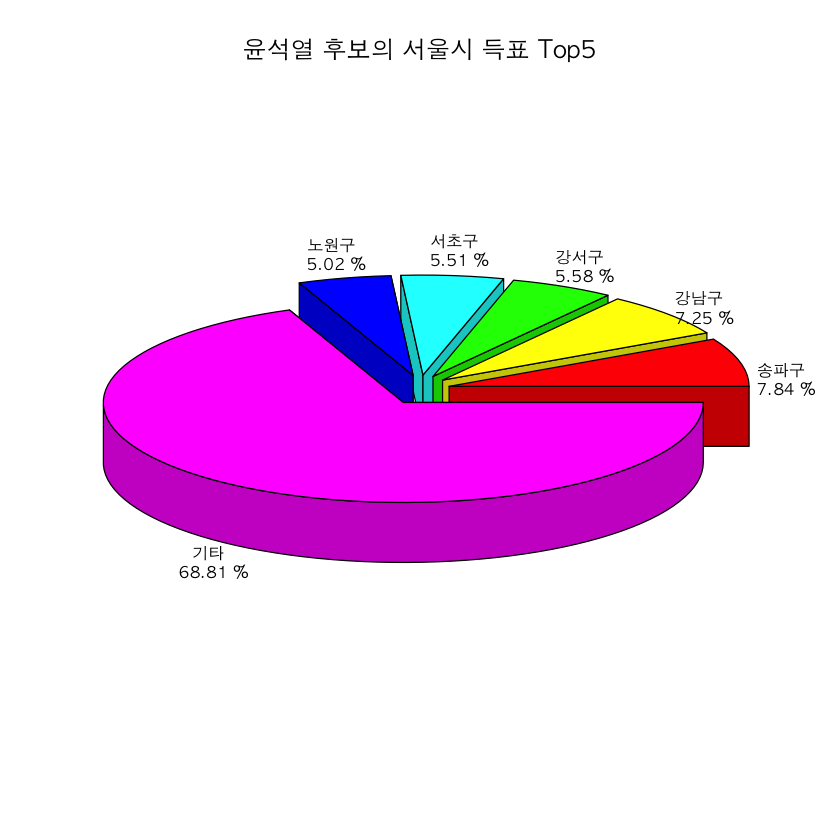

In [61]:
# 윤석렬 후보의 서울득표수 Top5를 구하고 나머지 지역은 기타로 합치기
seoulElection <- subset(election, 광역시도=='서울특별시')




seoulElection <- arrange(seoulElection, desc(seoulElection$윤석열))
orderYoon <- c(seoulElection$윤석열[1:5], sum(seoulElection$윤석열[6:nrow(seoulElection)]))
orderYoon <- round(orderYoon / sum(seoulElection$윤석열) * 100, 2)
label_yoon <- paste(c(as.character(seoulElection$시군구[1:5]), '기타'), "\n", orderYoon, "%")

options(warn=-1)
par(family = "AppleGothic")
pie3D(orderYoon,
    main = "윤석열 후보의 서울시 득표 Top5",
    labels = label_yoon, 
    labelcex = 0.8,
    radius = 1,
    explode = 0.1,
   )


In [70]:
election_seoul <- election[election$광역시도=='서울특별시',] # subset 대신 [,] 내에서 조건으로 가져올수 있다
election_seoul_윤석열 <- arrange(election_seoul, desc(윤석열))[,c(2,6)]
head(election_seoul)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.01


In [79]:
# Ratio 구하기
election_seoul_윤석열_ratio <- 
    round((c(election_seoul_윤석열[1:5, 2], sum(election_seoul_윤석열[-c(1:5),2])) /
           sum(election_seoul_윤석열$윤석열))*100, 2)

election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [81]:
# Label 만들기
election_seoul_윤석열_label <-
        c(as.character(election_seoul_윤석열$시군구[1:5]), "기타")

election_seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

# 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출쟁지는 서울특별시 성북구

In [127]:
# 윤석열 후보 출생지 득표율
sungbuk_ratio <-
    round(c(as.integer(election[election$시군구=='성북구',][,5:7]), election[election$시군구=='성북구',][, 4] 
      - sum(election[election$시군구=='성북구',][,5:7])) / election[election$시군구=='성북구',][, 4] * 100 ,2)

sungbuk_ratio

[1] 48.84 46.22  3.06  1.88

In [128]:
# 출생지에서의 Label 만들기
sungbuk_label <- c(colnames(election[, 5:7]), "기타")
sungbuk_label

[1] "이재명" "윤석열" "심상정" "기타"

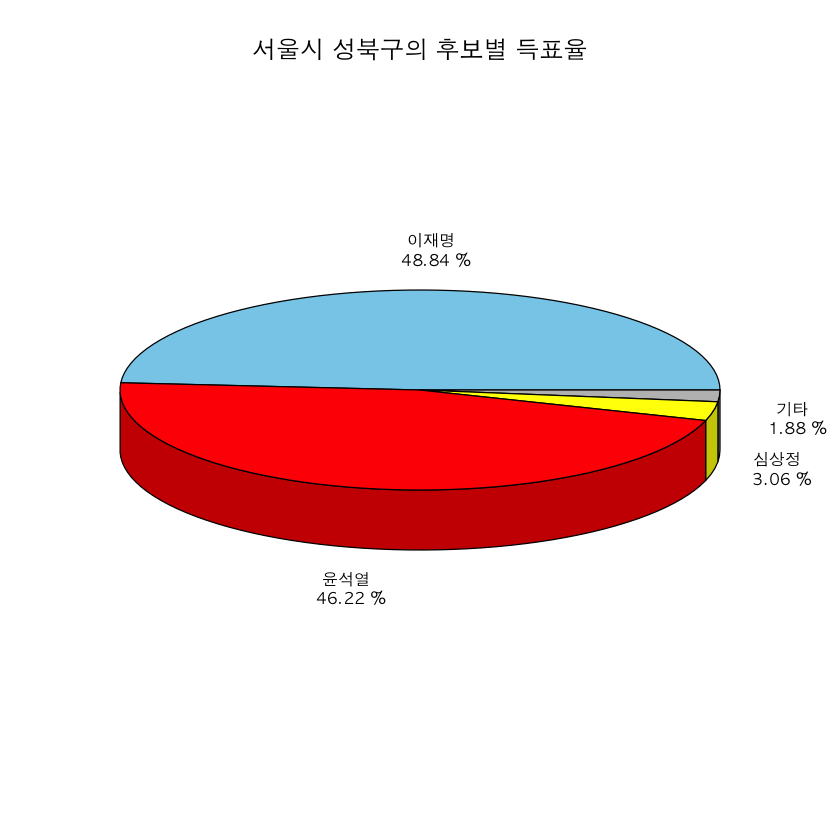

In [129]:
options(warn=-1)
par(family = "AppleGothic")
pie3D(sungbuk_ratio,
      main = "서울시 성북구의 후보별 득표율",
      labels = paste(sungbuk_label, '\n', sungbuk_ratio, '%'),
      labelcex = 0.8,
      col = c("skyblue", "red", "yellow", "gray")
      )



In [133]:
pob_윤석열 <- subset(election, 시군구=='성북구')
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [139]:
as.numeric(c((pob_윤석열[, 5:7]), pob_윤석열[,4] - sum(pob_윤석열[, 5:7])))

[1] 142702 135044   8952   5489